# TERMINAL PART WITH QUESTIONS(*)

*What will you use for the database? Input reads? 

I will use /data/references/hg19/hg19 for the database (Human Genome) and data/Lab6_data/mixed_reads1.fastq and data/Lab6_data/mixed_reads2.fastq  for the input reads. 

*If you use the --un unaligned.fastq option, what will unaligned.fastq contain? 

With this command unaligned.fastq contains the sequences that it was not able to align with the given Human genome (i.e filtered out sequences) . 


COMMAND 1: bowtie2 -p 4 --very-fast --no-unal -x /data/references/hg19/hg19  -1  /data/Lab6_data/mixed_reads1.fastq  -2 /data/Lab6_data/mixed_reads2.fastq -S output1.sam --un-conc unaligned.fastq
OUTPUT HUMAN: 

1285441 reads; of these:
  1285441 (100.00%) were paired; of these:
    1285105 (99.97%) aligned concordantly 0 times
    114 (0.01%) aligned concordantly exactly 1 time
    222 (0.02%) aligned concordantly >1 times
    ----
    1285105 pairs aligned concordantly 0 times; of these:
      227762 (17.72%) aligned discordantly 1 time
    ----
    1057343 pairs aligned 0 times concordantly or discordantly; of these:
      2114686 mates make up the pairs; of these:
        2062758 (97.54%) aligned 0 times
        15162 (0.72%) aligned exactly 1 time
        36766 (1.74%) aligned >1 times
19.76% overall alignment rate

*What percentage of your sequencing library came from contaminating human DNA?

19.76% of the sequencing library came from contaminating human DNA. 


COMMAND 2: bowtie2 -p 4 --very-fast --no-unal -x /data/references/shewanella_oneidensis_mr-1/shewanella_oneidensis_mr-1  -1  unaligned.1.fastq  -2 unaligned.2.fastq -S output2.sam --un-conc some.fastq

OUTPUT SHEWANELLA: 
1285105 reads; of these:
  1285105 (100.00%) were paired; of these:
    1049640 (81.68%) aligned concordantly 0 times
    220987 (17.20%) aligned concordantly exactly 1 time
    14478 (1.13%) aligned concordantly >1 times
    ----
    1049640 pairs aligned concordantly 0 times; of these:
      288853 (27.52%) aligned discordantly 1 time
    ----
    760787 pairs aligned 0 times concordantly or discordantly; of these:
      1521574 mates make up the pairs; of these:
        1245335 (81.85%) aligned 0 times
        221076 (14.53%) aligned exactly 1 time
        55163 (3.63%) aligned >1 times
51.55% overall alignment rate

COMMAND 3: bowtie2 -p 4 --very-sensitive --no-unal -x /data/references/shewanella_oneidensis_mr-1/shewanella_oneidensis_mr-1  -1  unaligned.1.fastq  -2 unaligned.2.fastq -S output3.sam --un-conc some.fastq

OUTPUT SHEWANELLA VERY SENSITIVE: 
1285105 reads; of these:
  1285105 (100.00%) were paired; of these:
    1048972 (81.63%) aligned concordantly 0 times
    221437 (17.23%) aligned concordantly exactly 1 time
    14696 (1.14%) aligned concordantly >1 times
    ----
    1048972 pairs aligned concordantly 0 times; of these:
      291246 (27.76%) aligned discordantly 1 time
    ----
    757726 pairs aligned 0 times concordantly or discordantly; of these:
      1515452 mates make up the pairs; of these:
        1238527 (81.73%) aligned 0 times
        220113 (14.52%) aligned exactly 1 time
        56812 (3.75%) aligned >1 times
51.81% overall alignment rate

*If you use the --un unaligned.fastq option, what will unaligned.fastq contain?

With this command unaligned.fastq contains the sequences that bowtie was not able to align with the given Shewanella genome. 

*What percentage of your filtered library didnâ€™t align to the reference genome?*

51.55%. This number goes up to 51.81% if we use the very sensitive option. 

*Convert SAM to BAM*

COMMAND 3: samtools view -b output3.sam > output3.bam 

*Sort*

COMMAND 4: samtools sort output3.bam > output3.sorted.bam

*Index*

COMMAND 5: samtools index output3.sorted.bam

*Depth* 

COMMAND 6: samtools depth -a output2.sorted.bam > outputdepth.tab



# PYTHON PART

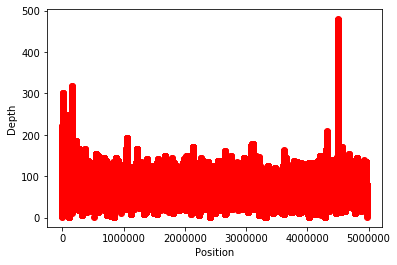

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x = []
y = []

table = pd.read_csv('outputdepth.tab', sep='\t')
alignment = pd.DataFrame(data=table)
alignment.reset_index()
x = alignment[alignment.columns[1]]
y = alignment[alignment.columns[2]]

plt.plot(x, y, 'ro')
plt.xlabel('Position')
plt.ylabel('Depth')
plt.show()

Above we have the graph of depth vs. coverage

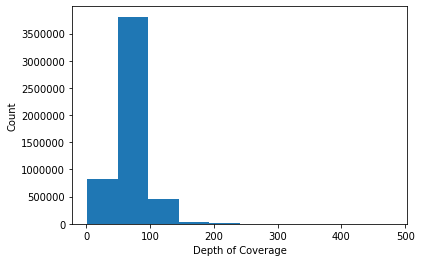

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x = []
y = []

table = pd.read_csv('outputdepth.tab', sep='\t')
alignment = pd.DataFrame(data=table)
alignment.reset_index()
x = alignment[alignment.columns[1]]
y = alignment[alignment.columns[2]]
x2,y2 = zip(*sorted(zip(y,x),key=lambda y: y[0]))

plt.hist(y)
plt.xlabel('Depth of Coverage')
plt.ylabel('Count')
plt.show()